<a href="https://colab.research.google.com/github/rafaborneo/eticaDiplo2021/blob/main/BorneoRafael_Practico2_ETICA_DIPLO2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PRACTICO 2 ETICA  DILODATOS 2021**

# **RAFAEL BORNEO BENISTA**

Tutorial práctico [notebook] basado en el tutorial Exploring Gender Bias in Word Embeddings (y su notebook), y la adaptación al castellano de Lucía González que aplica las herramientas de Responsibly, creado por Shlomi Hod, para mitigar sesgo de género en word embeddings.



Objetivo del práctico: formalicen otro atributo protegido para mitigar el sesgo sobre ese atributo. 

1.	Piensen un atributo que se pueda representar como binario (incluso si eso es una sobresimplificación): blanco - negro, rico - pobre, alto - bajo. 

2.	Representen ese eje en el espacio de embeddings, con dos extremos representados por una o más palabras.

3.	Encuentren palabras que según sus valores deberían ser neutras con respecto a ese eje pero no lo son, muestren que no lo son con el gráfico de barras centrado en el 0 del eje binario obtenido en 2.

4.	Neutralicen las palabras de 3. para que queden centradas en el 0 del eje binario, muestren cómo quedan centradas con el gráfico de barras.

Fecha de entrega: 6 de diciembre 2021




**SE EXPLORARA EL SESGO POSIBLE DE PERTENECER A UN GRUPO ETNICO PARTICULAR (CAUCASICOS-AFROAMERICANOS). BLANCOS-NEGROS para simplificar. DESCARGO: el sesgo racial seguramente NO ES BINARIO ya que existen multiples grupos etnicos en una sociedad. PARA SIMPLIFICAR SE ASUME QUE ES BINARIO**

In [ ]:
#instalacion libreria 
#HAY que REINICIAR ENTORNO DE EJECUCION DESPUES DE LA INSTALACION 
!pip install --user responsibly

     |████████████████████████████████| 28.2 MB 40.4 MB/s 
     |████████████████████████████████| 24.2 MB 1.4 MB/s 
     |████████████████████████████████| 12.8 MB 43.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 2.2.5 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 2.2.5 which is incompatible.
arviz 0.11.4 requires matplotlib>=3.0, but you have matplotlib 2.2.5 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import responsibly

responsibly.__version__

'0.1.3'

In [ ]:

# ignorar warnings


import warnings
warnings.filterwarnings('ignore')


In [ ]:
from responsibly.we import load_w2v_small

w2v_small = load_w2v_small()
# tamaño del vocabulario

len(w2v_small.vocab)

26423

In [ ]:
#La clase responsibly.we.BiasWordEmbedding. GenderBiasWE es una subclase de BiasWordEmbedding.

from responsibly.we import BiasWordEmbedding

w2v_small_racial_bias = BiasWordEmbedding(w2v_small, only_lower=True, verbose=True)#

Lei un articulo del 2015 (https://abcnews.go.com/2020/top-20-whitest-blackest-names/story?id=2470131) donde dice que  aquellos currículos que tienen nombre que suenan mas a gente de origen caucásico(blancos) tiene mas chances de ser bajados por empleadores que buscan candidatos que aquellos CVs que tienen nombres que suenan mas a gente de origen afro-americanos (negros) . Entonces, la idea en este practico es explorar sesgo racial (asumiendo que es un problema binario: blanco-negro, que no lo es por que hay mas de dos “razas”).

***Voy a intentar usar los nombre reportados en el articulo (80 nombres) para establecer la direccion racial usando el metodo sum***


In [ ]:
#white_common_names = ["Jake","Connor", 
#"Tanner", "Wyat", "Cody", "Dustin", "Luke", "Jack", "Scott", "Logan", 
#"Cole", 
#"Lucas", 
#"Bradley", 
#"Jacob", "Garret", "Dylan", "Maxwell", "Hunter", "Brett", "Colin",#
 #"Molly", "Amy", "Claire", "Emily", "Katie",  "Madeline", 
 #"Katelyn", "Emma", "Abigail", "Carly", "Jenna",  
 #"Heather", "Katherine", "Caitlin", "Kaitlin", "Holly", "Allison", "Kaitlyn", "Hannah", "Kathryn"]
                      ]

In [ ]:
#black_common_names = ["DeShawn", "DeAndre", "Marquis", "Darnell", "Terrell", "Malik", "Trevon", "Tyrone", "Willie", 
                     # "Dominique", "Demetrius", "Reginald", "Jamal", "Maurice", "Jalen", "Darius", "Xavier", "Terrance", "Andre", 
                     # "Darryl", "Imani", "Ebony", "Shanice", "Aaliyah",  "Precious", "Nia", "Deja", "Diamond", "Asia",  "Aliyah", "Jada", 
                     # "Tierra", "Tiara",  "Kiara", "Jazmine", "Jasmin", "Jazmin", "Jasmine",  "Alexus",  "Raven"]

In [ ]:
white_common_names = ['Emily', 'Anne', 'Jill', 'Allison', 'Laurie', 'Sarah', 'Meredith', 'Carrie',
                      'Kristen', 'Todd', 'Neil', 'Geoffrey', 'Brett', 'Brendan', 'Greg', 'Matthew',
                      'Jay', 'Brad']

black_common_names = ['Aisha', 'Keisha', 'Tamika', 'Lakisha', 'Tanisha', 'Latoya', 'Kenya', 'Latonya',
                      'Ebony', 'Rasheed', 'Tremayne', 'Kareem', 'Darnell', 'Tyrone', 'Hakim', 'Jamal',
                      'Leroy', 'Jermaine']

w2v_small_racial_bias._identify_direction('Whites', 'Blacks',
                                          definitional=(white_common_names, black_common_names),
                                          method='sum')

Identify direction using sum method...


In [ ]:
#Usar los nombres de profesiones neutros para medir el sesgo racial.
from responsibly.we.data import BOLUKBASI_DATA

In [ ]:
neutral_profession_names = w2v_small_racial_bias._filter_words_by_model(BOLUKBASI_DATA['gender']['neutral_profession_names'])
len(neutral_profession_names)

303

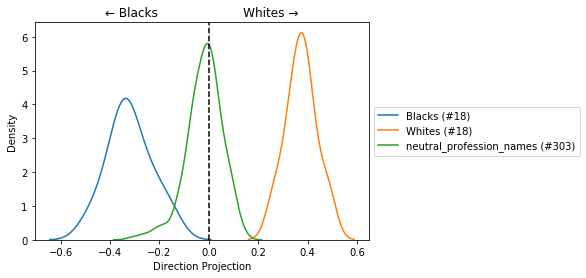

In [ ]:
w2v_small_racial_bias.plot_dist_projections_on_direction({'neutral_profession_names': neutral_profession_names,
                                                 'Whites': white_common_names,
                                                 'Blacks': black_common_names});
### Puede verse que los nombres tienen un sesgo racial ya que se inclinan a un lado o al otro del cero (neutro)

COMO HAY SESGO EVIDENTE EN EL NOMBRE, ME REGUNTO: HABRA SESGO RACIAL (CAUCASICO/BLANCO VS AFROMERICANO/NEGRO) EN LAS PROFESIONES?? OSEA HABRA PROFESIONES MAS "APTAS" ppRA BLANCOS? HABRA OTRAS PROFESIONES MAS APTAS PARA NEGROS?

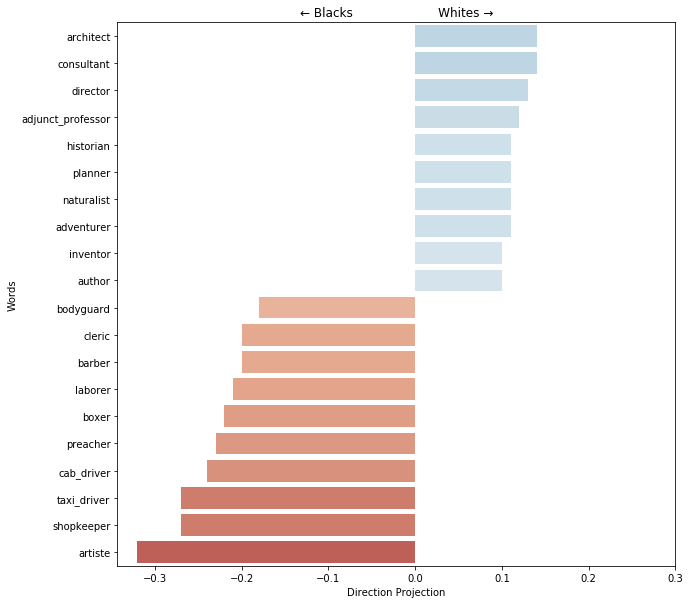

In [ ]:
#GRAFICO 10 PROFESIONES (que son neutras) SOBRE EL EJE "RACIAL" (EXTREMOS WHITE BLACK)

import matplotlib.pylab as plt
f, ax = plt.subplots(figsize=(10, 10))
w2v_small_racial_bias.plot_projection_scores(neutral_profession_names, 10, ax=ax);
#LUEGO DE GRAFICAR PUEDE VERSE QUE EFECTIVAMENTE LAS PROFESIONES TIENEN SESGO RACIAL, SIENDO ARQUITECTO MAS PARA BLANCOS, MIENTRAS QUE
#(Taxista(Cab driver) mas para negros. PARECIERA QUE LAS PROFESIONES MAS NEUTRALES SON PARA BLANCOS

LUEGO DE GRAFICAR PUEDE VERSE QUE EFECTIVAMENTE LAS PROFESIONES TIENEN SESGO RACIAL. PARECIERA QUE LOS BLANCOS TIENEN PROFESIONES MAS INTELECTUALES (AUTOR; ARQUITECTO, HISTORIADOR, NATURISTA ETC),MIENTRaS QUE LOS AFROMERICANOS PROFESIONES MENOS INTELECTUALES (BOXEADOR, TAXISTA, REVERENDO, BARBERO, ETC)

# **calculo sesgo directo**

In [ ]:
# w2v_small_racial_bias.calc_direct_bias()
neutral_racial_projections = [w2v_small[word] @ w2v_small_racial_bias.direction
                                  for word in neutral_profession_names]

abs_neutral_racial_projections = [abs(proj) for proj in neutral_racial_projections]

sum(abs_neutral_racial_projections) / len(abs_neutral_racial_projections)

0.05703133966989578

In [ ]:
#uso un nombre comun para negro (RASHIED) Y ARQUITECTO
w2v_small_racial_bias.model['Rasheed'] @ w2v_small_racial_bias.model['architect']

0.02917136

In [ ]:
#uso un nombre comun para BLANCO(greg) Y ARQUITECTO
w2v_small_racial_bias.model['Greg'] @ w2v_small_racial_bias.model['architect']

0.122917295

notese QUE ALL USAR UN NOMBRE COMUN DE BLANCO (greg) PARA ARQUITECTO EL SCORE DE SESGO SE HACEMAS POSITIVO OSEA INCLINA HACIA EL EXTREMO DE BLANCOS

In [ ]:
#que pasa si ponemos nombre de mujeres blanca (emily) y negras(keisha) EFTO MAS PRONUNCIADO?????
w2v_small_racial_bias.model['Emily'] @ w2v_small_racial_bias.model['architect'], w2v_small_racial_bias.model['Keisha'] @ w2v_small_racial_bias.model['architect']

(0.02792712, -0.065241784)

**NUETRALIZACION PARA MITIGAR SESGO** se usara la lista de profesiones neutras para plicar el debias


In [ ]:
neutral_profession_names = w2v_small_racial_bias._filter_words_by_model(BOLUKBASI_DATA['gender']['neutral_profession_names'])

In [ ]:
w2v_small_racial_debias = w2v_small_racial_bias.debias(method = 'neutralize' , neutral_words= neutral_profession_names, inplace=False)

Neutralize...


100%|██████████| 303/303 [00:00<00:00, 13453.39it/s]


**VER SI CAMBIO EL SCORE EN PROFESIONES (DISTANCIA)**

In [ ]:
#nomre comun blancos (greg)
w2v_small_racial_debias.model['Greg'] @ w2v_small_racial_debias.model['architect']
#para el nombre GREG la distancia se acerco a cero osea se volvio mas neutra (se ha reducido el sesgo?)


0.054918095

In [ ]:
#Nombre comun negros (rasheed)
w2v_small_racial_debias.model['Rasheed'] @ w2v_small_racial_debias.model['architect']
#para el nombre Rasheed el score cambió hacia laderecha (+ white)



0.09280317

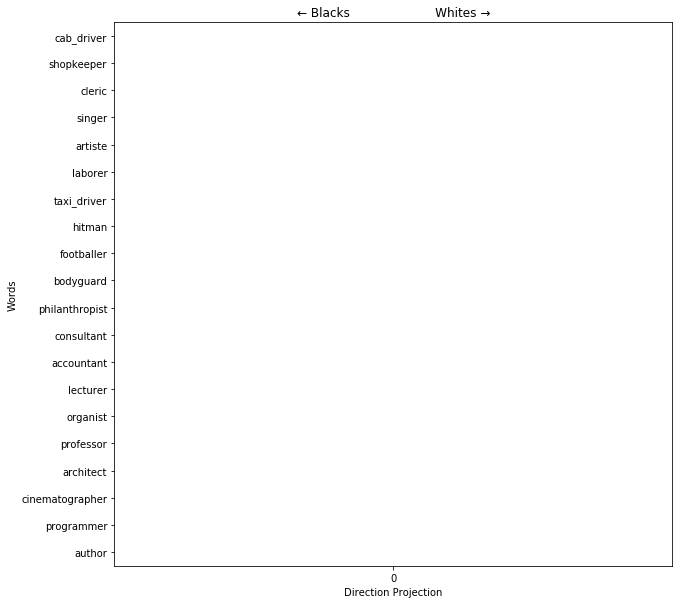

In [ ]:

f, ax = plt.subplots(figsize=(10, 10))
w2v_small_racial_debias.plot_projection_scores(neutral_profession_names, 10, ax=ax);
#NO APARECEN LAS PROFESIONES SEGADAS COMO SUCEDIA ANTERIORMENTE

GRAFICAR LAS PROYECCIONES DE ALGUNAS ALGUNAS PALABRAS

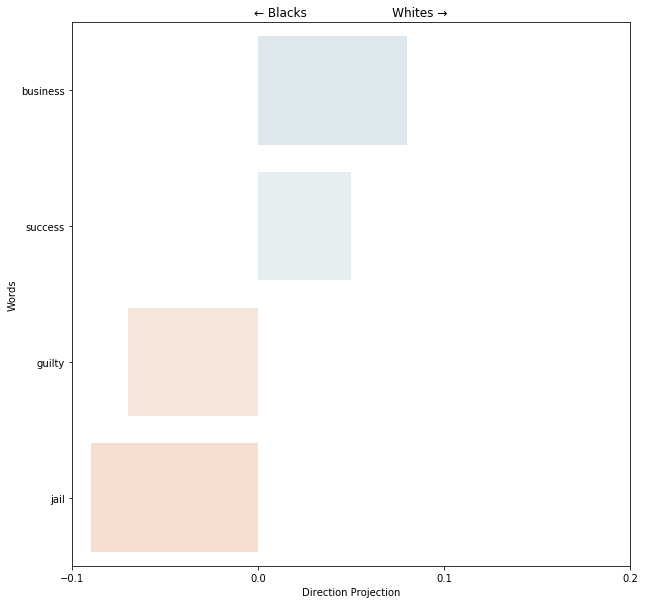

In [ ]:
#PALABRAS SUCCESS (EXITO), Business, Jail,  assasin
f, ax = plt.subplots(1, figsize=(10, 10))
w2v_small_racial_debias.plot_projection_scores(['jail' ,'guilty',
                                                'business', 'success'
                                                ], n_extreme=40, ax=ax);
#SUCCESS y BUSINESS ESTA SESGADO A BLANCOS MIENTRAS QUE JAIL Y GUILTY A NEGROS